In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 47s 0us/step


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
inputs = keras.Input(shape=(32, 32, 3))
x = inputs
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(256, 3, activation='relu', padding="same")(x)
#x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dense(256)(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0     

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist=model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6852 - accuracy: 0.7603
Epoch 2/5
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6258 - accuracy: 0.7792
Epoch 3/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5713 - accuracy: 0.8011
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5159 - accuracy: 0.81890s -
Epoch 5/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.4624 - accuracy: 0.83730s - loss:
313/313 - 3s - loss: 0.8567 - accuracy: 0.7373


[0.856658399105072, 0.7372999787330627]

In [8]:
    score = model.evaluate(x_test, y_test, verbose=1)
    

313/313 [==============================] - 3s 9ms/step - loss: 0.8504 - accuracy: 0.6975


In [10]:
print("최종 정확도 : " + str( score[1] * 100 ) + " %")

최종 정확도 : 69.74999904632568 %


KeyError: 'val_loss'

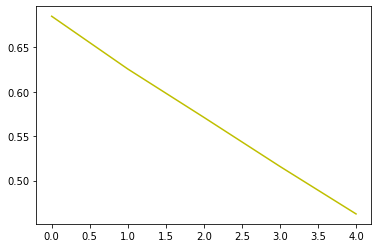

In [12]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")